In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
## read in CSV file
raw_returns = pd.read_csv("vote_results.csv")

In [62]:
raw_returns.head(15)

,Unnamed: 0,province,district,precinct,number_of_voters_included_in_the_list,number_of_ballots_received_by_the_precinct_commission,number_of_ballots_issued_to_early_voters,number_of_ballots_issued_at_the_polling_station,number_of_ballots_issued_outside_the_polling_station,number_of_cancelled_ballots,...,party_4_peoples_voice,party_5_greenleaf,party_6_unity_of_atlantia,party_7_just_path,total_ballots_issued,total_ballots_returned,pct_turnout,pct_invalidated,precinct_winner,enough_ballots
0,1,Republic of Halcyra,1 Peakgate,5,1572,1680,0,772,47,861,...,213,46,263,8,819,807,0.513359,0.029740,party_6_unity_of_atlantia,True
1,2,Republic of Halcyra,1 Peakgate,45,1616,1670,0,722,44,904,...,168,34,192,4,766,766,0.474010,0.189295,party_6_unity_of_atlantia,True
2,3,Republic of Halcyra,1 Peakgate,42,1897,1900,0,833,53,1014,...,231,33,261,4,886,883,0.465472,0.013590,party_6_unity_of_atlantia,True
3,4,Republic of Halcyra,1 Peakgate,43,1487,1500,0,563,44,893,...,164,21,196,4,607,607,0.408204,0.013180,party_6_unity_of_atlantia,True
4,5,Republic of Halcyra,1 Peakgate,44,1543,1500,0,635,25,840,...,185,13,217,6,660,660,0.427738,0.013636,party_6_unity_of_atlantia,False
5,6,Republic of Halcyra,1 Peakgate,9,1819,1850,0,863,28,959,...,253,40,251,11,891,887,0.487631,0.039459,party_4_peoples_voice,True
6,7,Republic of Halcyra,1 Peakgate,6,1457,1400,0,822,33,545,...,231,49,243,15,855,849,0.582704,0.036514,party_6_unity_of_atlantia,False
7,8,Republic of Halcyra,1 Peakgate,7,1500,1550,0,904,26,620,...,296,68,244,7,930,929,0.619333,0.003229,party_4_peoples_voice,True
8,9,Republic of Halcyra,1 Peakgate,8,1427,1450,0,689,24,737,...,213,36,222,8,713,710,0.497547,0.008451,party_6_unity_of_atlantia,True
9,10,Republic of Halcyra,1 Peakgate,13,1908,1900,0,950,23,927,...,278,36,278,6,973,973,0.509958,0.016444,party_4_peoples_voice,False


In [64]:
## Some simple data smells. Are there enough ballots for every registered voter?
raw_returns['enough_ballots'] = raw_returns['number_of_ballots_received_by_the_precinct_commission'] >= raw_returns['number_of_voters_included_in_the_list']
raw_returns['enough_ballots'].value_counts()

enough_ballots
False    58395
True     36830
Name: count, dtype: int64

In [12]:
## Add new column for total ballots issued
raw_returns['total_ballots_issued'] = raw_returns['number_of_ballots_issued_to_early_voters'] + raw_returns['number_of_ballots_issued_at_the_polling_station'] + raw_returns['number_of_ballots_issued_outside_the_polling_station']

In [82]:
## Add new column for total ballots returned
raw_returns['total_ballots_returned'] = raw_returns['number_of_invalid_ballots'] + raw_returns['number_of_valid_ballots']

In [86]:
## Data smell #2. Does the number of ballots received ever exceed the number of ballots issued?
raw_returns['too_many_ballots'] = raw_returns['total_ballots_returned'] > raw_returns['total_ballots_issued']
raw_returns['too_many_ballots'].value_counts()

too_many_ballots
False    95207
True        18
Name: count, dtype: int64

In [88]:
raw_returns.query('too_many_ballots == True')

,Unnamed: 0,province,district,precinct,number_of_voters_included_in_the_list,number_of_ballots_received_by_the_precinct_commission,number_of_ballots_issued_to_early_voters,number_of_ballots_issued_at_the_polling_station,number_of_ballots_issued_outside_the_polling_station,number_of_cancelled_ballots,...,party_5_greenleaf,party_6_unity_of_atlantia,party_7_just_path,total_ballots_issued,total_ballots_returned,pct_turnout,pct_invalidated,precinct_winner,enough_ballots,too_many_ballots
3409,3410,Uldorn Republic,10 Bayouham,1724,288,300,0,139,4,156,...,3,83,1,143,144,0.500000,0.000000,party_6_unity_of_atlantia,True,True
6534,6535,Novara Region,11 Sunny Pointden,250,2453,2500,0,1511,13,976,...,94,400,8,1524,1545,0.629841,0.009709,party_1_fairland,True,True
14348,14349,Chulani Republic - Chulania,13 Coastgreen,485,186,196,0,125,15,55,...,2,76,0,140,141,0.758065,0.078014,party_6_unity_of_atlantia,True,True
15662,15663,Iridia Region,14 Frost Mossstead,775,2665,2600,0,1028,25,1547,...,102,259,11,1053,1068,0.400750,0.013109,party_4_peoples_voice,False,True
17023,17024,Torana Region,14 Bluffshire,242,2712,2700,0,1432,48,1220,...,42,492,9,1480,1481,0.546091,0.023633,party_6_unity_of_atlantia,False,True
19561,19562,Uldorn Republic,16 Clear Isle,549,1709,1500,0,865,27,607,...,45,326,5,892,893,0.522528,0.021277,party_6_unity_of_atlantia,False,True
20458,20459,Orlea Region,16 Gold Park,161,2227,2100,0,1104,101,895,...,25,338,16,1205,1206,0.541536,0.019071,party_4_peoples_voice,False,True
45602,45603,Lyria Region,27 Glen Coastshire,886,2119,2000,0,942,14,1044,...,34,275,9,956,957,0.451628,0.047022,party_6_unity_of_atlantia,False,True
45651,45652,Lyria Region,27 Glen Coastshire,893,2016,2000,0,830,45,1125,...,50,243,3,875,876,0.434524,0.022831,party_1_fairland,False,True
53032,53033,Arcadia Region,30 Fieldside,931,1471,1360,0,763,33,564,...,12,267,3,796,797,0.541808,0.010038,party_6_unity_of_atlantia,False,True


In [20]:
## Add new column for pct turnout for each precinct
raw_returns['pct_turnout'] = raw_returns['total_ballots_returned'] / raw_returns['number_of_voters_included_in_the_list']

In [78]:
## Explore turnout statistics
raw_returns['pct_turnout'].describe()

count    95225.000000
mean         0.657251
std          0.180562
min          0.000000
25%          0.515166
50%          0.615918
75%          0.793651
max          1.000000
Name: pct_turnout, dtype: float64

In [116]:
## Calculate the number of various party votes as a percentage of all valid votes
raw_returns['fairland_pct'] = raw_returns['party_1_fairland']/raw_returns['number_of_valid_ballots']
raw_returns['natl_union_pct'] = raw_returns['party_2_national_union']/raw_returns['number_of_valid_ballots']
raw_returns['defenders_pct'] = raw_returns['party_3_defenders_of_atlantia']/raw_returns['number_of_valid_ballots']
raw_returns['peoples_pct'] = raw_returns['party_4_peoples_voice']/raw_returns['number_of_valid_ballots']
raw_returns['greenleaf_pct'] = raw_returns['party_5_greenleaf']/raw_returns['number_of_valid_ballots']
raw_returns['unity_pct'] = raw_returns['party_6_unity_of_atlantia']/raw_returns['number_of_valid_ballots']
raw_returns['just_path_pct'] = raw_returns['party_7_just_path']/raw_returns['number_of_valid_ballots']

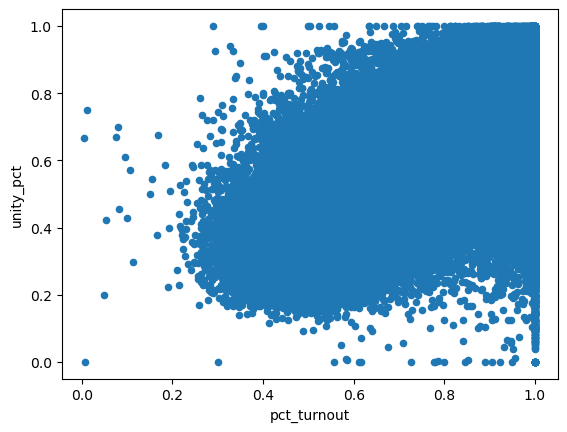

In [94]:
## Compare voter turnout to pct who voted for Unity
turnout_unity_scatter = raw_returns.plot.scatter(x='pct_turnout',
                                                 y='unity_pct')

In [24]:
## Add new column for percent of ballots invalidated
raw_returns['pct_invalidated'] = raw_returns['number_of_invalid_ballots']/raw_returns['total_ballots_returned']

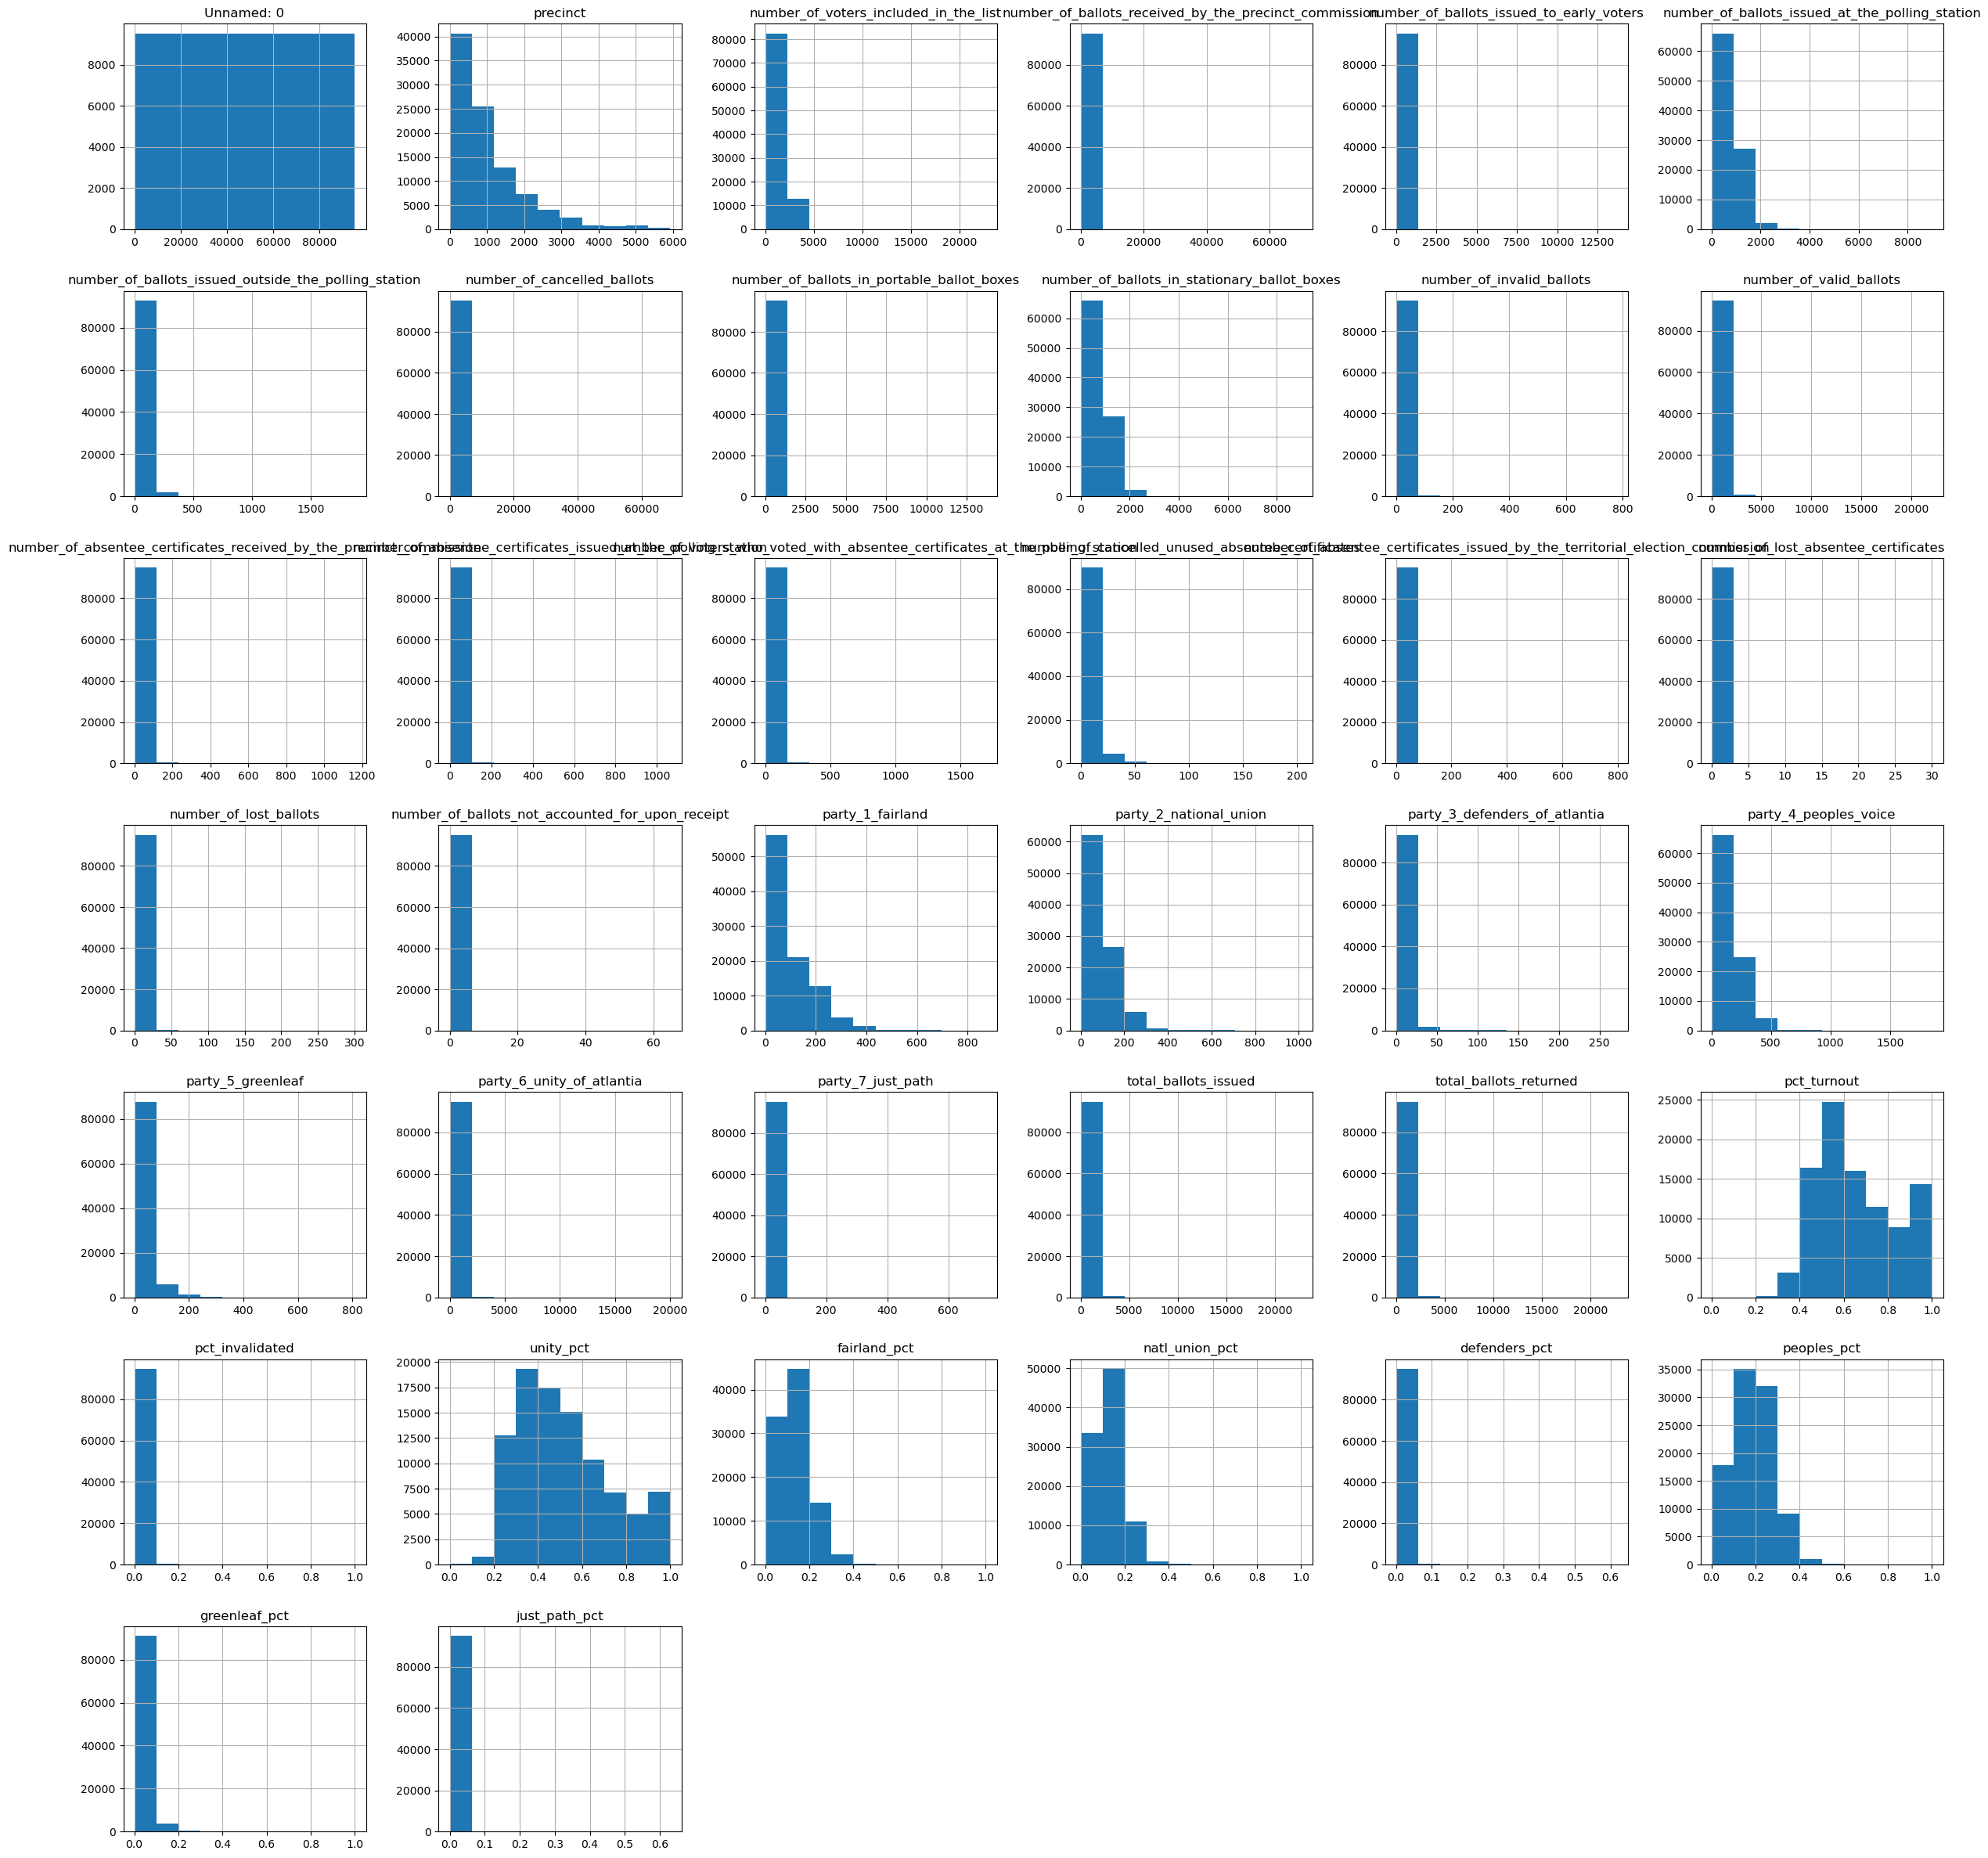

In [120]:
## Look at the distribution of different columns
invalidation_histo = raw_returns.hist(figsize=(30, 30)) 

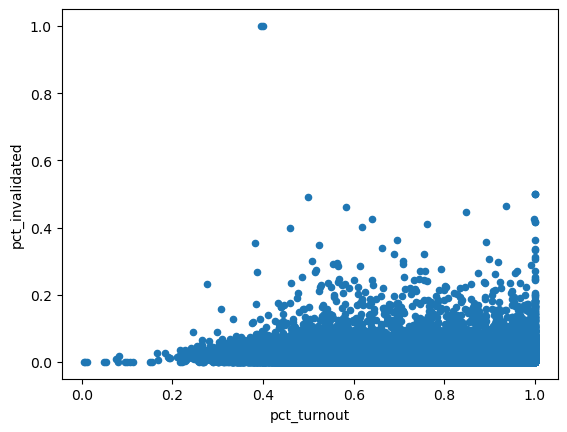

In [122]:
## Look at turnout vs. pct invalidated
turnout_invalid_scatter = raw_returns.plot.scatter(x='pct_turnout',
                                                 y='pct_invalidated')

In [30]:
## Make a new dataframe, high_invalid, for precincts where 10% or more of ballots were invalidated
high_invalid = raw_returns.query('pct_invalidated >= .1')

In [50]:
high_invalid

,Unnamed: 0,province,district,precinct,number_of_voters_included_in_the_list,number_of_ballots_received_by_the_precinct_commission,number_of_ballots_issued_to_early_voters,number_of_ballots_issued_at_the_polling_station,number_of_ballots_issued_outside_the_polling_station,number_of_cancelled_ballots,...,party_2_national_union,party_3_defenders_of_atlantia,party_4_peoples_voice,party_5_greenleaf,party_6_unity_of_atlantia,party_7_just_path,total_ballots_issued,total_ballots_returned,pct_turnout,pct_invalidated
1,2,Republic of Halcyra,1 Peakgate,45,1616,1670,0,722,44,904,...,101,14,168,34,192,4,766,766,0.474010,0.189295
84,85,Kryndor Territory,1 Windy View,784,77,77,0,38,3,36,...,8,1,7,0,14,0,41,41,0.532468,0.170732
271,272,Republic of Bastralia,1 White Gardengreen,784,1607,1600,0,1356,46,198,...,107,8,245,14,675,6,1402,1402,0.872433,0.134807
417,418,Republic of Tashkaria (Tashkaria),1 Low Shore,493,169,168,0,153,14,1,...,6,0,9,2,122,0,167,167,0.988166,0.131737
779,780,Belvoria Region,1 Wild Town,47,1018,1043,0,955,57,31,...,25,1,56,3,779,3,1012,1012,0.994106,0.105731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94050,94051,Ulthar Region,9 Branchshire,275,121,115,0,97,3,15,...,21,1,26,0,32,0,100,100,0.826446,0.100000
94246,94247,Harmon-Mantle Autonomous Region - Yurin,9 Frost Shore,545,317,360,42,233,7,78,...,17,8,18,1,183,0,282,282,0.889590,0.138298
94312,94313,Republic of Lomara,9 Shadow Bayou,650,123,135,0,53,9,73,...,12,1,5,2,26,1,62,62,0.504065,0.129032
95150,95151,Exterra Territory,99 Rock Marshmoor,5480,2450,2500,0,2450,0,50,...,48,2,12,0,1882,0,2450,2450,1.000000,0.193878


In [36]:
# Identify districts with many high-rejection-rate precincts
high_invalid['district'].value_counts().head(25)

district
65 Glenshire            18
10 Mount Brook          12
20 Red Bridgeover        8
7 Silver Bury            8
3 High Bluffvale         7
21 Pine Townfield        7
9 East Glenstead         7
17 Rock Branch           6
39 Mount Cliff           6
41 River Fieldshire      6
41 South Ridge           5
29 Hillvale              5
26 Dalegrove             5
103 North Branchbank     5
53 Peakburg              5
18 Fort Glenvale         5
8 River Streamstead      4
35 East Pointforth       4
6 Grand Bayou            4
34 Cedar Fieldgreen      4
29 Misty Havenworth      4
108 Old Brookthorpe      4
20 Port Villevale        4
15 Bayway                4
21 Cedar Isleover        4
Name: count, dtype: int64

In [54]:
## Make an even more restricted version of high_invalid, one_third_plus_invalid, including only precincts where one-third or more of ballots were invalidated

one_third_plus_invalid = high_invalid.query('pct_invalidated >= .33')

In [80]:
one_third_plus_invalid

,Unnamed: 0,province,district,precinct,number_of_voters_included_in_the_list,number_of_ballots_received_by_the_precinct_commission,number_of_ballots_issued_to_early_voters,number_of_ballots_issued_at_the_polling_station,number_of_ballots_issued_outside_the_polling_station,number_of_cancelled_ballots,...,party_2_national_union,party_3_defenders_of_atlantia,party_4_peoples_voice,party_5_greenleaf,party_6_unity_of_atlantia,party_7_just_path,total_ballots_issued,total_ballots_returned,pct_turnout,pct_invalidated
5543,5544,City of Stellara,102 Windy Groveedge,76,1815,1400,0,947,14,439,...,58,5,126,30,220,7,961,951,0.523967,0.347003
5749,5750,City of Stellara,103 North Branchbank,1869,12,12,0,12,0,0,...,0,0,2,0,4,0,12,12,1.000000,0.416667
17893,17894,Samaria Region,15 River Burn,313,325,310,0,199,16,95,...,14,1,24,0,81,0,215,215,0.661538,0.339535
27199,27200,Belvoria Region,19 Broad Parkover,983,163,165,0,163,0,2,...,13,0,12,1,77,1,163,163,1.000000,0.337423
27519,27520,Tyrrhenia Region,19 Port Shorestoke,713,531,484,0,395,10,79,...,45,4,18,6,149,2,405,405,0.762712,0.409877
27849,27850,Republic of Tashkaria (Tashkaria),2 Cedar Dalegreen,559,270,267,0,231,10,26,...,6,0,19,2,119,0,241,241,0.892593,0.356846
29904,29905,Somara Region,2 High Point,44,1409,1450,0,393,255,802,...,39,3,45,6,246,1,648,646,0.458481,0.399381
31684,31685,Republic of Kirith,20 Red Bridgeover,706,12,12,12,0,0,0,...,1,1,1,0,4,0,12,12,1.000000,0.416667
31695,31696,Republic of Kirith,20 Red Bridgeover,719,10,10,10,0,0,0,...,0,0,0,3,2,0,10,10,1.000000,0.500000
33446,33447,Saranth Region,21 Pine Townfield,1148,949,964,0,586,22,356,...,6,0,25,0,314,0,608,608,0.640674,0.424342


In [42]:
# Creates a new column, precinct_winner, that identifies the party with the largest share of the vote in each precinct.

raw_returns['precinct_winner'] = raw_returns[['party_1_fairland','party_2_national_union','party_3_defenders_of_atlantia','party_4_peoples_voice','party_5_greenleaf','party_6_unity_of_atlantia','party_7_just_path']].idxmax(axis=1)

In [46]:
raw_returns['precinct_winner'].value_counts()

precinct_winner
party_6_unity_of_atlantia        82657
party_4_peoples_voice             9034
party_1_fairland                  2826
party_2_national_union             615
party_5_greenleaf                   86
party_7_just_path                    4
party_3_defenders_of_atlantia        3
Name: count, dtype: int64